# Data Scientist Nanodegree
## Supervised Learning
## Project: CLASSIFICATION for *IRIS_DATASET*

Welcome to the first project of the Data Scientist Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Please specify WHICH VERSION OF PYTHON you are using when submitting this notebook. Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [96]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline
import pathlib

import numpy as np
import pandas as pd

import tensorflow as tf

from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import tensorflow_datasets as tfds

In [97]:


from sklearn import datasets

iris = datasets.load_iris()

iris_df=pd.DataFrame(iris.data)


In [98]:
data = tfds.load('radon' , split ='train')

In [99]:
state = 'MN'
radon_data = tfds.as_dataframe(data)
radon_data.rename(lambda s: s[9:] if s.startswith('feat') else s, axis=1, inplace=True)
df = radon_data[radon_data.state==state.encode()].copy()

In [100]:
df.head(10)

,activity,Uppm,adjwt,basement,cntyfips,county,dupflag,floor,idnum,lat,lon,pcterr,region,rep,room,startdt,starttm,state,state2,stfips,stopdt,stoptm,stratum,typebldg,wave,windoor,zip,zipflag
8,6.0,1.312080,990.411560,b'Y',13,b'BLUE EARTH ',0,0,5161,44.035000,-94.067001,5.6,4,4,7,20288,1300,b'MN',b'MN',27,20288,1301,3,1,47,b' ',56001,0
29,12.2,0.862876,461.623657,b'Y',163,b'WASHINGTON ',0,0,5926,45.037998,-92.884003,2.9,3,2,4,121987,2130,b'MN',b'MN',27,122187,2130,2,1,31,b' ',55016,0
32,0.8,0.622088,433.316711,b'Y',137,b'ST LOUIS ',0,0,5793,47.588001,-92.461998,23.1,1,3,4,121387,1700,b'MN',b'MN',27,121587,1700,2,1,28,b' ',55792,0
39,3.3,0.622088,471.366211,b'Y',137,b'ST LOUIS ',0,0,5829,47.588001,-92.461998,7.6,1,5,5,10188,1123,b'MN',b'MN',27,10188,1104,2,1,35,b' ',55807,0
60,2.9,0.530789,485.435944,b'Y',35,b'CROW WING ',0,0,5231,46.483002,-94.070000,9.2,2,1,4,11988,800,b'MN',b'MN',27,12188,800,2,1,40,b' ',56431,0
67,26.6,1.410270,1024.442871,b'Y',27,b'CLAY ',2,0,5207,46.891998,-96.489998,2.5,2,1,4,122187,755,b'MN',b'MN',27,122387,935,3,1,28,b' ',56549,0
76,3.9,0.910987,893.237427,b'Y',97,b'MORRISON ',0,0,5575,46.013000,-94.267998,12.9,2,5,1,20288,1600,b'MN',b'MN',27,20288,1800,3,1,48,b' ',56466,0
116,2.9,0.428565,485.435944,b'Y',3,b'ANOKA ',0,0,5120,45.272999,-93.246002,9.0,3,1,4,20288,810,b'MN',b'MN',27,20288,600,2,1,40,b' ',55304,0
124,2.1,0.907991,2116.561523,b'N',53,b'HENNEPIN ',0,1,5347,45.005001,-93.476997,12.3,3,1,3,30388,1921,b'MN',b'MN',27,31088,2022,5,1,38,b' ',55316,0
153,10.2,1.201100,1214.922729,b'Y',165,b'WATONWAN ',0,1,5969,43.978001,-94.613998,3.5,5,3,4,12388,1000,b'MN',b'MN',27,12588,1030,4,1,37,b' ',56088,0


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 919 entries, 8 to 12554
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   activity  919 non-null    float64
 1   Uppm      919 non-null    float64
 2   adjwt     919 non-null    float64
 3   basement  919 non-null    object 
 4   cntyfips  919 non-null    int64  
 5   county    919 non-null    object 
 6   dupflag   919 non-null    int64  
 7   floor     919 non-null    int64  
 8   idnum     919 non-null    int64  
 9   lat       919 non-null    float64
 10  lon       919 non-null    float64
 11  pcterr    919 non-null    float64
 12  region    919 non-null    int64  
 13  rep       919 non-null    int64  
 14  room      919 non-null    int64  
 15  startdt   919 non-null    int64  
 16  starttm   919 non-null    int64  
 17  state     919 non-null    object 
 18  state2    919 non-null    object 
 19  stfips    919 non-null    int64  
 20  stopdt    919 non-null    int6

- there are 4  contineous values features and 9 categoriacal features and in total there are 45222 rows and 14 cols.
- 4.6 mb data
- dependent value id income, which is categoriacal  non qantitative. <=50K or >50K class. 
- so binary class problem.


# STATISTICS OF CONTINEOUS VARIABLE FEATURES: 

In [109]:
df.describe()

,activity,Uppm,adjwt,cntyfips,dupflag,floor,idnum,lat,lon,pcterr,region,rep,room,startdt,starttm,stfips,stopdt,stoptm,stratum,typebldg,wave,zip,zipflag
count,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.0,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000
mean,4.768118,0.933912,1051.681924,87.413493,0.085963,0.166485,5540.000000,45.575958,-93.647531,10.481719,3.119695,2.942329,3.285092,58827.323177,1413.824810,27.0,57139.746464,1420.341676,3.171926,1.039173,32.013058,55729.577802,0.001088
std,4.481584,0.320094,595.841523,52.126239,0.340141,0.372719,265.436747,1.366324,1.197807,8.477540,1.303102,1.424170,1.624065,51281.333735,483.270698,0.0,50830.218730,508.209828,1.128380,0.453250,13.005271,516.793603,0.032987
min,0.000000,0.414025,348.042938,1.000000,0.000000,0.000000,5081.000000,43.671001,-96.781998,0.000000,1.000000,1.000000,0.000000,10188.000000,0.000000,27.0,10188.000000,0.000000,1.000000,0.000000,1.000000,55007.000000,0.000000
25%,1.900000,0.622088,471.366211,41.000000,0.000000,0.000000,5310.500000,44.672001,-94.267998,5.200000,2.000000,2.000000,2.000000,12688.000000,1000.000000,27.0,12638.000000,1000.000000,2.000000,1.000000,25.000000,55318.000000,0.000000
50%,3.600000,0.907991,990.411560,85.000000,0.000000,0.000000,5540.000000,45.037998,-93.348999,8.100000,3.000000,3.000000,4.000000,22488.000000,1415.000000,27.0,22588.000000,1420.000000,3.000000,1.000000,34.000000,55746.000000,0.000000
75%,6.000000,1.201100,1146.499146,137.000000,0.000000,0.000000,5769.500000,46.591999,-92.884003,12.700000,4.000000,4.000000,4.000000,121687.000000,1817.500000,27.0,121787.000000,1835.500000,4.000000,1.000000,42.000000,56119.500000,0.000000
max,48.200001,1.695580,2314.365234,173.000000,2.000000,1.000000,5999.000000,48.777000,-90.388000,66.300003,5.000000,5.000000,7.000000,123187.000000,2337.000000,27.0,123187.000000,2355.000000,5.000000,5.000000,50.000000,57006.000000,1.000000


# STATISTICS OF CATEGORICAL VARIABLE FEATURES: 

# NUMBERS OF THE MISSING NO OF VARIABLES :

In [103]:
df.isnull().sum()

activity    0
Uppm        0
adjwt       0
basement    0
cntyfips    0
county      0
dupflag     0
floor       0
idnum       0
lat         0
lon         0
pcterr      0
region      0
rep         0
room        0
startdt     0
starttm     0
state       0
state2      0
stfips      0
stopdt      0
stoptm      0
stratum     0
typebldg    0
wave        0
windoor     0
zip         0
zipflag     0
dtype: int64

# DISTRIBUTION OF DEPENDENT VARIABLE :

In [ ]:
import seaborn as sns
#histogram
sns.histplot(iris_df['class']);

- class imbalance is noticed by a huge amount 

# CO-RELATION  MATRIX BETWEEN DIFFERNT FEATURES :

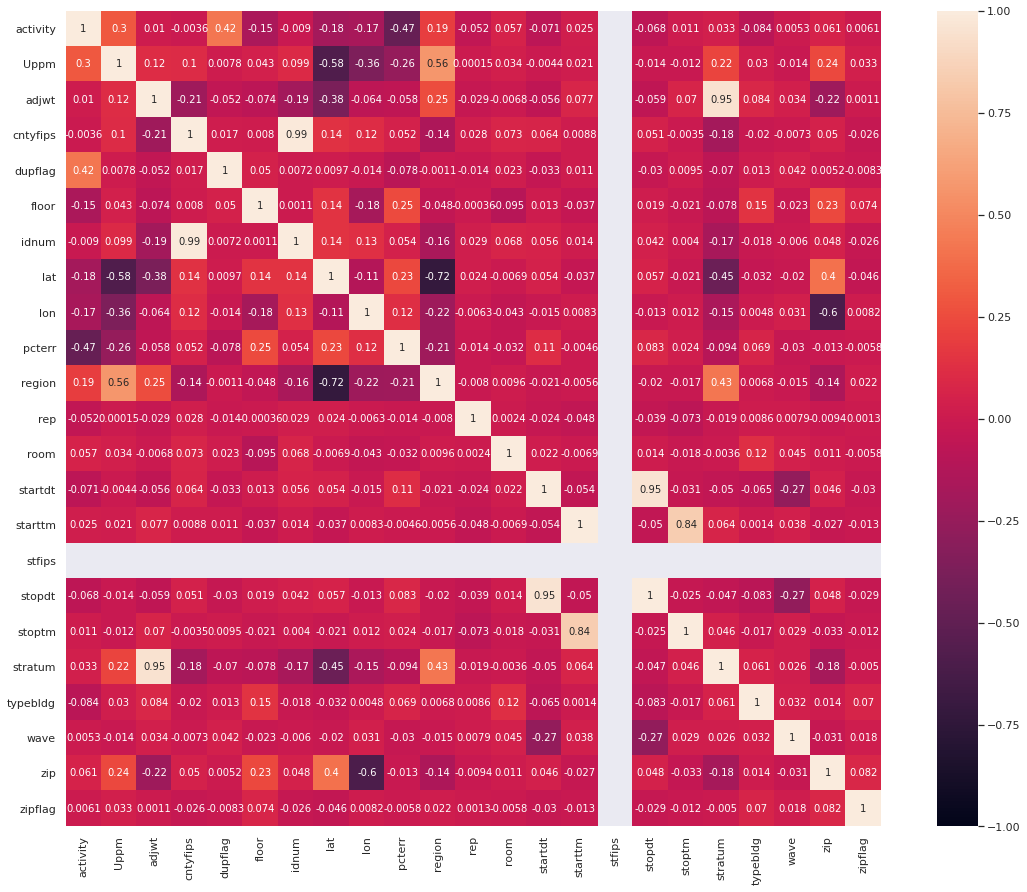

In [105]:
import matplotlib.pyplot as plt

#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corrmat, vmax=1,vmin=-1 ,square=True , annot=True);

# RELATIONSHIPS BETWEEN THE DIFFERNT FEATURES WITH REACH OTHER :(BOTH CATEGORICAL & CONTINEOUS):

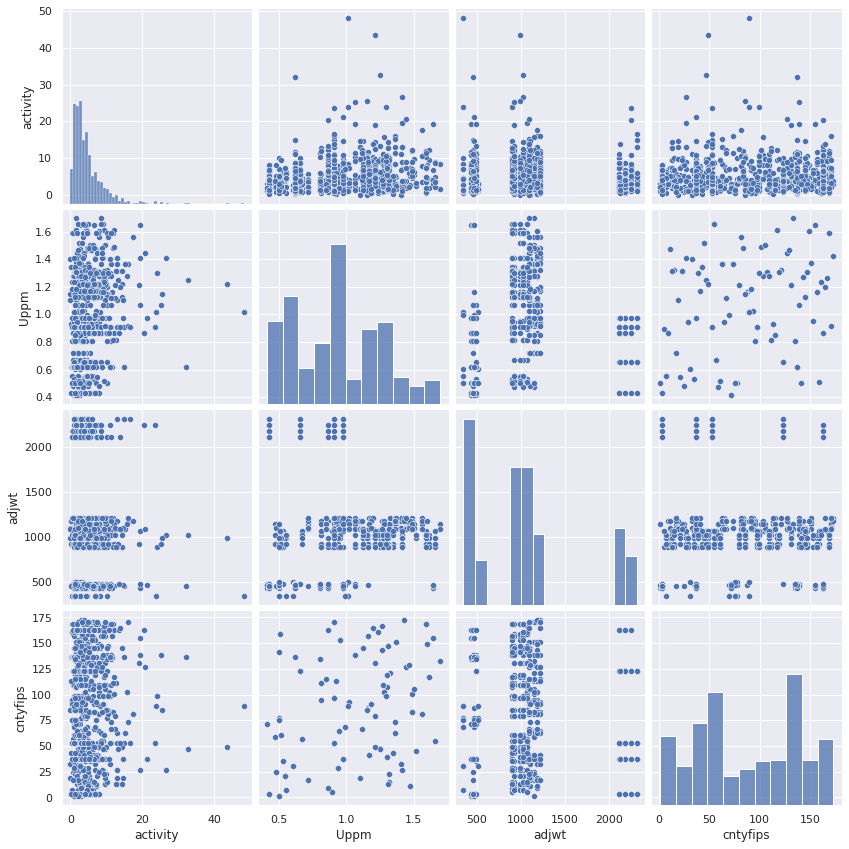

In [107]:
sns.set()
cols = list(df.columns[:5])
sns.pairplot(df[cols], height = 3)
plt.show();

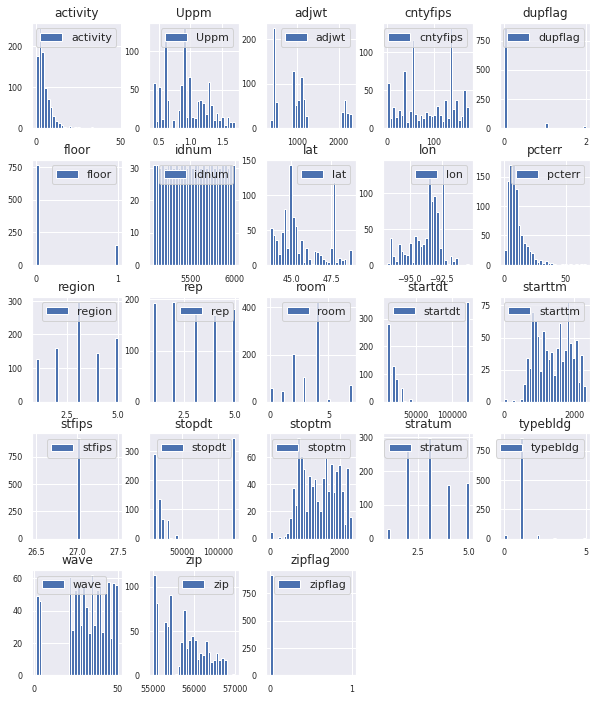

In [108]:
df.hist(figsize=(10, 12), bins=30, xlabelsize=8, ylabelsize=8,legend = True); # ; avoid having the matplotlib verbose informations

### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

** HINT: ** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [ ]:
# TODO: Total number of records
data = iris_df.copy(deep=True)
n_records = len(data)

# TODO: Number of records where individual's income is more than $50,000
low = len(data[data['class'] == 0])

# TODO: Number of records where individual's income is at most $50,000
medium = len(data[(data['class'] == 1)])

# TODO: Number of records where individual's income is more than $50,000
high = len(data[data['class'] == 2])


# TODO: Percentage of individuals whose income is more than $50,000
very_percent = 100*(high/n_records)

# Print the results
print("Total number of records             : {}".format(n_records))
print("Individuals very high               : {}".format(high))
print("Individuals low                     : {}".format(low))

print("Percentage of high                  : {}%".format(100*high/n_records))
print("Percentage of medium                : {}%".format(100*medium/n_records))
print("Percentage of low                   : {}%".format(100*low/n_records))

** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

In [ ]:
# Split the data into features and target label
income_raw = data['class']
features_raw = data.drop('class', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

In [112]:
df.columns

Index(['activity', 'Uppm', 'adjwt', 'basement', 'cntyfips', 'county',
       'dupflag', 'floor', 'idnum', 'lat', 'lon', 'pcterr', 'region', 'rep',
       'room', 'startdt', 'starttm', 'state', 'state2', 'stfips', 'stopdt',
       'stoptm', 'stratum', 'typebldg', 'wave', 'windoor', 'zip', 'zipflag'],
      dtype='object')

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [122]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['activity', 'Uppm', 'adjwt', 'cntyfips', 'dupflag', 'floor', 'idnum',
       'lat', 'lon', 'pcterr', 'region', 'rep', 'room', 'startdt', 'starttm',
       'stfips', 'stopdt', 'stoptm', 'stratum', 'typebldg', 'wave', 'zip',
       'zipflag']

features_log_minmax_transform = pd.DataFrame(data = df)
features_log_minmax_transform[numerical] = scaler.fit_transform(df[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,activity,Uppm,adjwt,basement,cntyfips,county,dupflag,floor,idnum,lat,lon,pcterr,region,rep,room,startdt,starttm,state,state2,stfips,stopdt,stoptm,stratum,typebldg,wave,windoor,zip,zipflag
8,0.124481,0.700754,0.326685,b'Y',0.069767,b'BLUE EARTH ',0.0,0.0,0.087146,0.071288,0.424616,0.084465,0.75,0.75,1.000000,0.089381,0.556269,b'MN',b'MN',0.0,0.089381,0.552442,0.50,0.2,0.938776,b' ',0.497249,0.0
29,0.253112,0.350239,0.057763,b'Y',0.941860,b'WASHINGTON ',0.0,0.0,0.920479,0.267724,0.609634,0.043741,0.50,0.25,0.571429,0.989380,0.911425,b'MN',b'MN',0.0,0.991150,0.904459,0.25,0.2,0.612245,b' ',0.004502,0.0
32,0.016598,0.162352,0.043367,b'Y',0.790698,b'ST LOUIS ',0.0,0.0,0.775599,0.767137,0.675634,0.348416,0.00,0.50,0.571429,0.984071,0.727428,b'MN',b'MN',0.0,0.985841,0.721868,0.25,0.2,0.551020,b' ',0.392696,0.0
39,0.068465,0.162352,0.062718,b'Y',0.790698,b'ST LOUIS ',0.0,0.0,0.814815,0.767137,0.675634,0.114630,0.00,1.00,0.714286,0.000000,0.480531,b'MN',b'MN',0.0,0.000000,0.468790,0.25,0.2,0.693878,b' ',0.400200,0.0
60,0.060166,0.091111,0.069873,b'Y',0.197674,b'CROW WING ',0.0,0.0,0.163399,0.550725,0.424148,0.138763,0.25,0.00,0.571429,0.015929,0.342319,b'MN',b'MN',0.0,0.017699,0.339703,0.25,0.2,0.795918,b' ',0.712356,0.0


In [124]:
features_log_minmax_transform.describe(include=np.object).transpose()

,count,unique,top,freq
basement,919,3,b'Y',819
county,919,85,b'ST LOUIS ',116
state,919,1,b'MN',919
state2,919,1,b'MN',919
windoor,919,1,b' ',919


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_log_minmax_transform'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [125]:
# import preprocessing from sklearn
from sklearn import preprocessing


# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_log_minmax_transform = features_log_minmax_transform#.drop('Description', axis = 1)
features_final = pd.get_dummies(data= features_log_minmax_transform)

# TODO: Encode the 'income_raw' data to numerical values
#income = pd.get_dummies(data=)
multi_label = preprocessing.LabelEncoder()
multi_label = multi_label.fit(income_raw)
income = multi_label.transform(income_raw)

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
#print(encoded)


114 total features after one-hot encoding.


In [126]:
print(encoded)

['activity', 'Uppm', 'adjwt', 'cntyfips', 'dupflag', 'floor', 'idnum', 'lat', 'lon', 'pcterr', 'region', 'rep', 'room', 'startdt', 'starttm', 'stfips', 'stopdt', 'stoptm', 'stratum', 'typebldg', 'wave', 'zip', 'zipflag', "basement_b' '", "basement_b'N'", "basement_b'Y'", "county_b'AITKIN              '", "county_b'ANOKA               '", "county_b'BECKER              '", "county_b'BELTRAMI            '", "county_b'BENTON              '", "county_b'BIG STONE           '", "county_b'BLUE EARTH          '", "county_b'BROWN               '", "county_b'CARLTON             '", "county_b'CARVER              '", "county_b'CASS                '", "county_b'CHIPPEWA            '", "county_b'CHISAGO             '", "county_b'CLAY                '", "county_b'CLEARWATER          '", "county_b'COOK                '", "county_b'COTTONWOOD          '", "county_b'CROW WING           '", "county_b'DAKOTA              '", "county_b'DODGE               '", "county_b'DOUGLAS             '", "county_b'FARI

In [127]:
features_final.head(2)

,activity,Uppm,adjwt,cntyfips,dupflag,floor,idnum,lat,lon,pcterr,region,rep,room,startdt,starttm,stfips,stopdt,stoptm,stratum,typebldg,wave,zip,zipflag,basement_b' ',basement_b'N',basement_b'Y',county_b'AITKIN ',county_b'ANOKA ',county_b'BECKER ',county_b'BELTRAMI ',county_b'BENTON ',county_b'BIG STONE ',county_b'BLUE EARTH ',county_b'BROWN ',county_b'CARLTON ',county_b'CARVER ',county_b'CASS ',county_b'CHIPPEWA ',county_b'CHISAGO ',county_b'CLAY ',...,county_b'MOWER ',county_b'MURRAY ',county_b'NICOLLET ',county_b'NOBLES ',county_b'NORMAN ',county_b'OLMSTED ',county_b'OTTER TAIL ',county_b'PENNINGTON ',county_b'PINE ',county_b'PIPESTONE ',county_b'POLK ',county_b'POPE ',county_b'RAMSEY ',county_b'REDWOOD ',county_b'RENVILLE ',county_b'RICE ',county_b'ROCK ',county_b'ROSEAU ',county_b'SCOTT ',county_b'SHERBURNE ',county_b'SIBLEY ',county_b'ST LOUIS ',county_b'STEARNS ',county_b'STEELE ',county_b'STEVENS ',county_b'SWIFT ',county_b'TODD ',county_b'TRAVERSE ',county_b'WABASHA ',county_b'WADENA ',county_b'WASECA ',county_b'WASHINGTON ',county_b'WATONWAN ',county_b'WILKIN ',county_b'WINONA ',county_b'WRIGHT ',county_b'YELLOW MEDICINE ',state_b'MN',state2_b'MN',windoor_b' '
8,0.124481,0.700754,0.326685,0.069767,0.0,0.0,0.087146,0.071288,0.424616,0.084465,0.75,0.75,1.000000,0.089381,0.556269,0.0,0.089381,0.552442,0.50,0.2,0.938776,0.497249,0.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
29,0.253112,0.350239,0.057763,0.941860,0.0,0.0,0.920479,0.267724,0.609634,0.043741,0.50,0.25,0.571429,0.989380,0.911425,0.0,0.991150,0.904459,0.25,0.2,0.612245,0.004502,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1


### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [31]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.1, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 135 samples.
Testing set has 15 samples.


In [32]:
X_train.shape , y_train.shape

((135, 4), (135,))

In [36]:
labeling = y_train

In [37]:
labeling.shape

(135,)

In [53]:


import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

def tnse_pipeline(X_train , pca_componts =2 , tnse_components= 2 , perplex = 50.0):

      pca = PCA(n_components= pca_componts)#pca_componts)
      components = pca.fit_transform(X_train)

      total_var = pca.explained_variance_ratio_.sum() * 100
      print("total amamout of variation : {}".format(total_var))

      labels = {str(i): f"PC {i+1} ({var:.1f}%)" for i, var in enumerate(pca.explained_variance_ratio_ * 100)}

      # The default of 1,000 iterations gives fine results, but I'm training for longer just 
      # out some marginal improvements. NB: This takes almost an hour!

      tsne = TSNE(random_state=1, n_iter=1000, metric="cosine", n_components= tnse_components , perplexity= perplex)
      embs = tsne.fit_transform(X_train)
      tsne_data = np.vstack((embs.T, labeling)).T
      tsne_df = pd.DataFrame(data=tsne_data, columns=('Dim_1', 'Dim_2', 'label'))
      # Ploting the result of tsne
      sns.FacetGrid(tsne_df, hue='label', height=10).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
      plt.show()

      return pca, tsne_df, components


total amamout of variation : 99.17072850638768


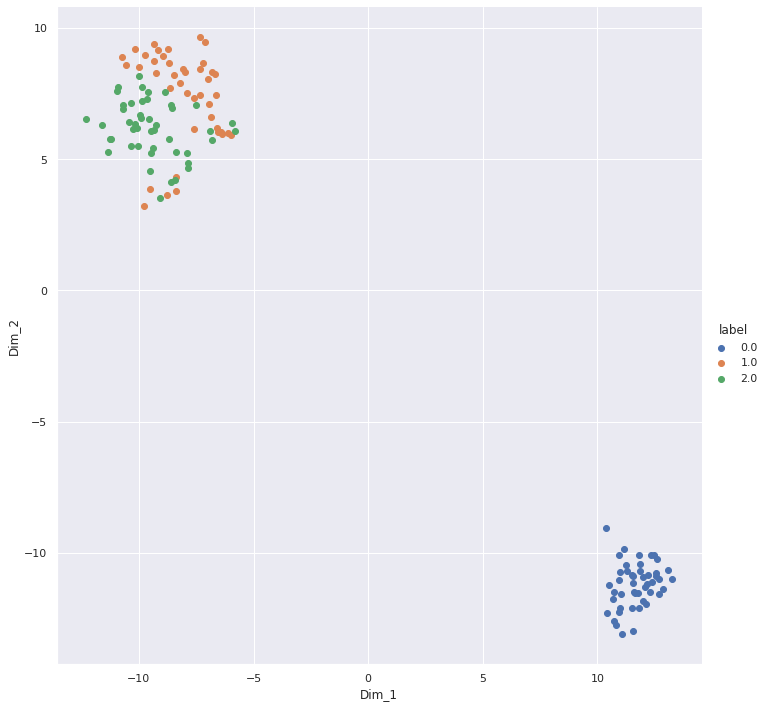

In [55]:

pca , tnse, components = tnse_pipeline(X_train , pca_componts =3 , tnse_components= 2 , perplex = 40.0)

In [57]:
#print(class_names)
fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=labeling,
    #title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},

    size_max = 15,
    width =  1024,
    height = 1024
    
)
fig.show()

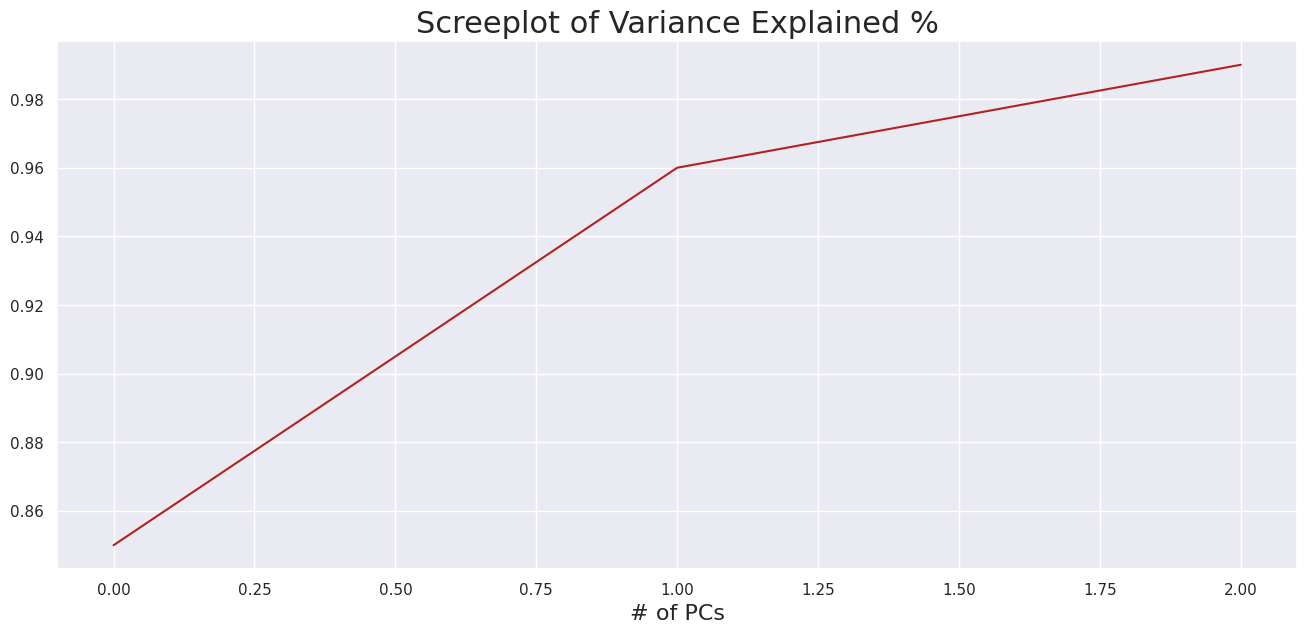

In [58]:
variance_exp_cumsum = pca.explained_variance_ratio_.cumsum().round(2)
fig, axes = plt.subplots(1,1,figsize=(16,7), dpi=100)
plt.plot(variance_exp_cumsum, color='firebrick')
plt.title('Screeplot of Variance Explained %', fontsize=22)
plt.xlabel('# of PCs', fontsize=16)
plt.show()

Text(0, 0.5, 'variance %')

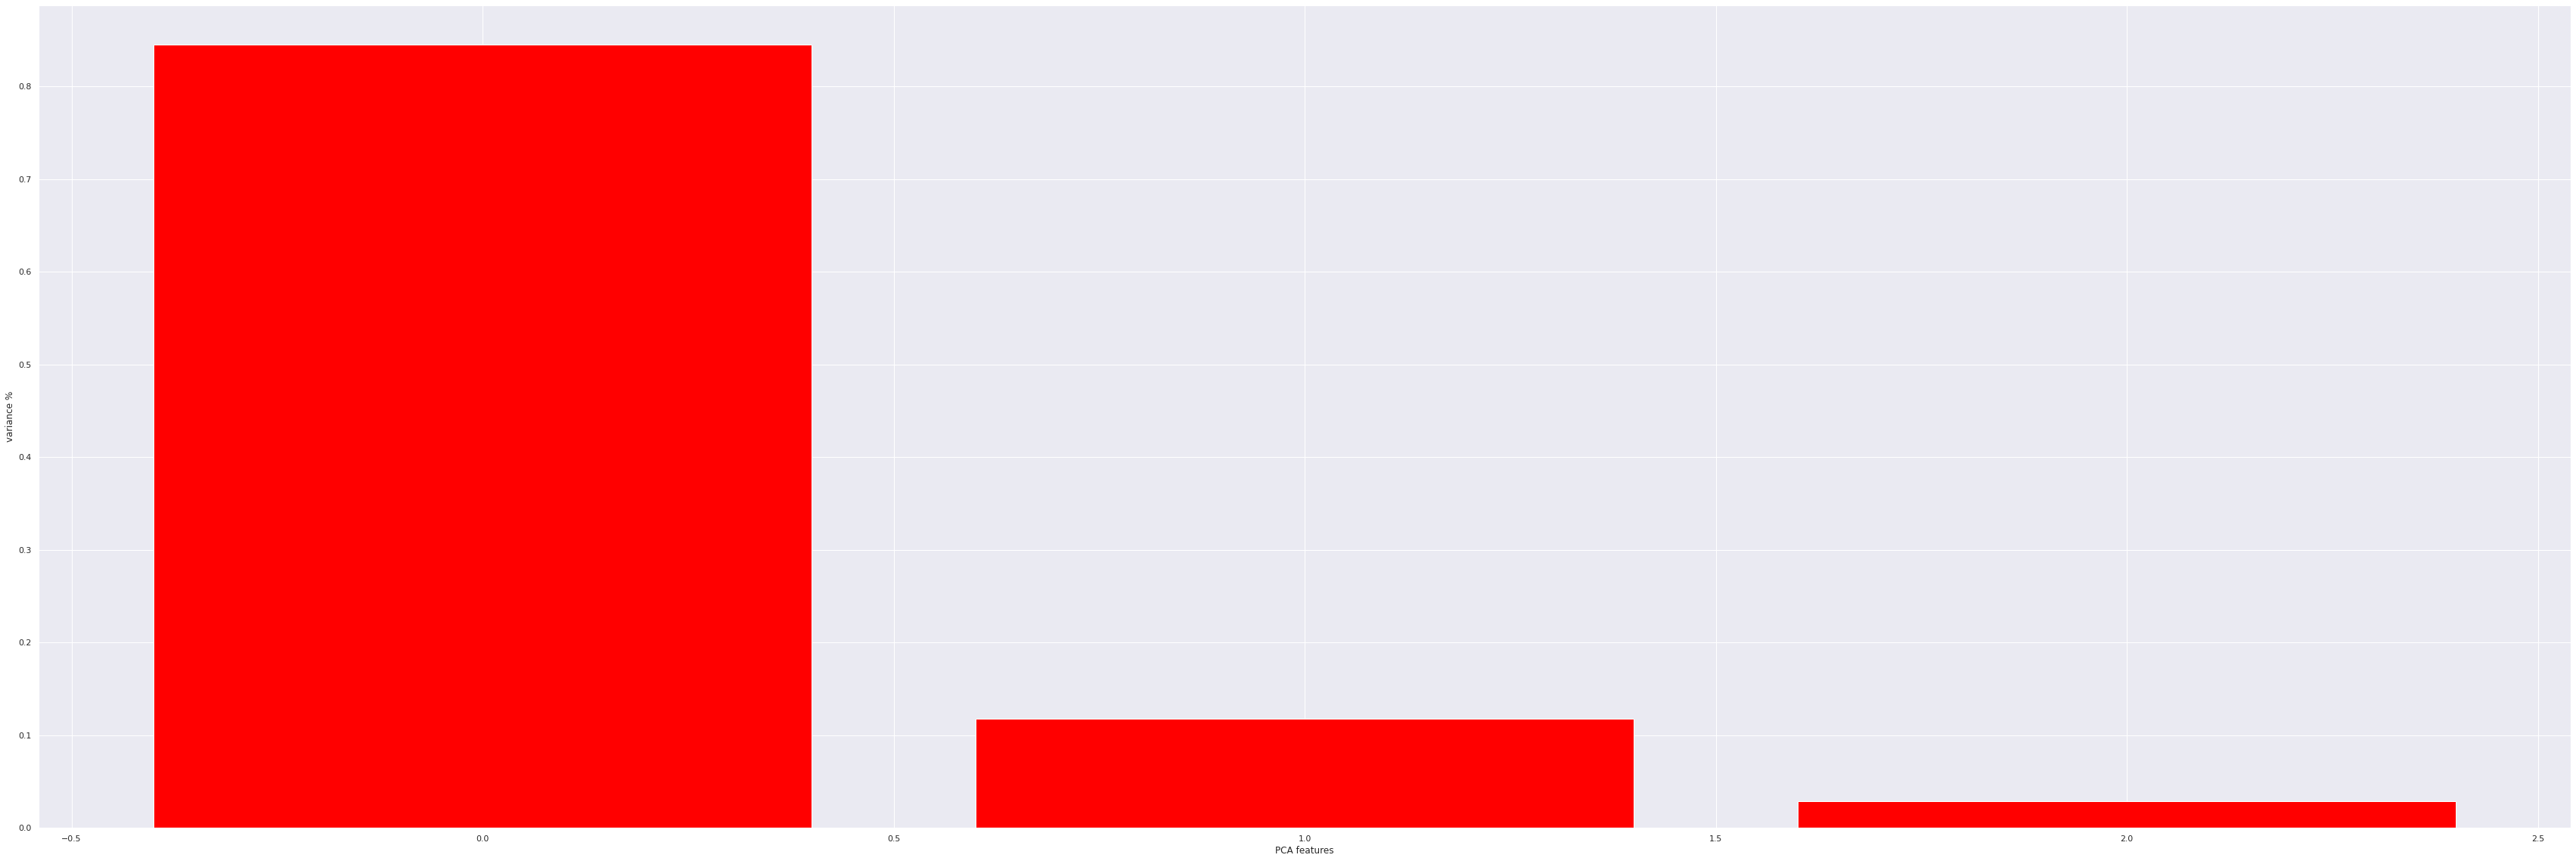

In [59]:
# Plot the explained variances
plt.figure(figsize=(60,20))
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='red')
plt.xlabel('PCA features')
plt.ylabel('variance %')
#plt.xticks(features)

In [60]:
# get basic info
n_components = len(pca.explained_variance_ratio_)
explained_variance = pca.explained_variance_ratio_
cum_explained_variance = np.cumsum(explained_variance)
idx = np.arange(n_components)+1

df_explained_variance = pd.DataFrame([explained_variance, cum_explained_variance], 
                                     index=['explained variance', 'cumulative'], 
                                     columns=idx).T

mean_explained_variance = df_explained_variance.iloc[:37,0].mean() # calculate mean explained variance

# DISPLAY info about PCs
print('PCA Overview')
print('='*40)
print("Total: {} components".format(n_components))
print('-'*40)
print('Mean explained variance:', round(mean_explained_variance,3))
print('-'*40)
print(df_explained_variance.head(45))
print('-'*40)

PCA Overview
Total: 3 components
----------------------------------------
Mean explained variance: 0.331
----------------------------------------
   explained variance  cumulative
1            0.845171    0.845171
2            0.117834    0.963005
3            0.028703    0.991707
----------------------------------------


In [61]:
# Store as dataframe and print
df_pca = components
df_pca = pd.DataFrame(df_pca)
print(df_pca.shape)  #> (3147, 784)
#df_pca.round(2).head(1)

(135, 3)


In [62]:
# Principal Components Weights (Eigenvectors)
df_pca_loadings = pd.DataFrame(pca.components_)
print("the pca loading shape: ", df_pca_loadings.shape)
#df_pca_loadings.head()

the pca loading shape:  (3, 4)


In [63]:
############### DEFINE PARAMS
top_k = 3
#select data based on percentile (top_q) or top-k features
top_q = .50
top_pc = 3
###############

# PCA factor loadings
df_c = pd.DataFrame(pca.components_, columns=features_final.columns).T

print("Factor Loadings for the 1. component \n(explains {0:.2f} of the variance)".format(df_explained_variance.iloc[0,0]))
print('='*40,'\n')
print('Top {} highest'.format(top_k))
print('-'*40)
print(df_c.iloc[:,0].sort_values(ascending=False)[:top_k], '\n')

print('Top {} lowest'.format(top_k))
print('-'*40)
print(df_c.iloc[:,0].sort_values()[:top_k])

Factor Loadings for the 1. component 
(explains 0.85 of the variance)

Top 3 highest
----------------------------------------
sepal_wid    0.142876
sepal_len   -0.425387
petal_len   -0.627038
Name: 0, dtype: float64 

Top 3 lowest
----------------------------------------
petal_wid   -0.636754
petal_len   -0.627038
sepal_len   -0.425387
Name: 0, dtype: float64


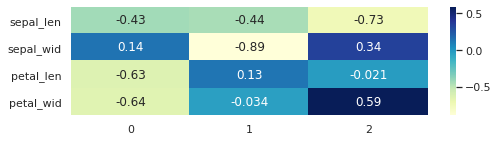

In [64]:
# Plot heatmap
size_yaxis = round(features_final.shape[1]*0.5 )

fig, ax = plt.subplots(figsize=(8,size_yaxis))
sns.heatmap(df_c.iloc[:,:5], annot=True, cmap="YlGnBu", ax=ax)
plt.show()

In [65]:
def pca_results(df, pca, component_no, features_no, show_plot=True):
    
    # Build a dataframe with features_no features capturing most variability
    # for a given component number (component_no)
    pca_comp = pd.DataFrame(np.round(pca.components_, 4), columns=df.keys()).iloc[component_no - 1]
    pca_comp.sort_values(ascending=False, inplace=True)
    pca_comp = pd.concat([pca_comp.head(features_no), pca_comp.tail(features_no)])
    
    if show_plot:
        # Plot the result
        pca_comp.plot(kind='bar', 
                  title='Most {} weighted features for PCA component {}'.format(features_no*2, component_no),
                  figsize=(12, 6))
        plt.show()
    
    return pca_comp

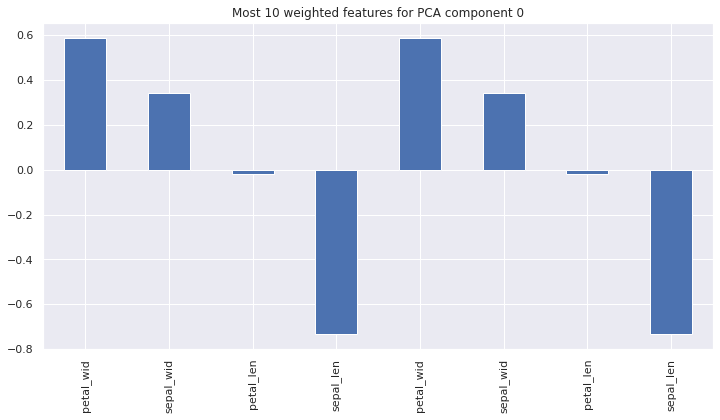

petal_wid    0.5872
sepal_wid    0.3407
petal_len   -0.0207
sepal_len   -0.7340
petal_wid    0.5872
sepal_wid    0.3407
petal_len   -0.0207
sepal_len   -0.7340
Name: 2, dtype: float64


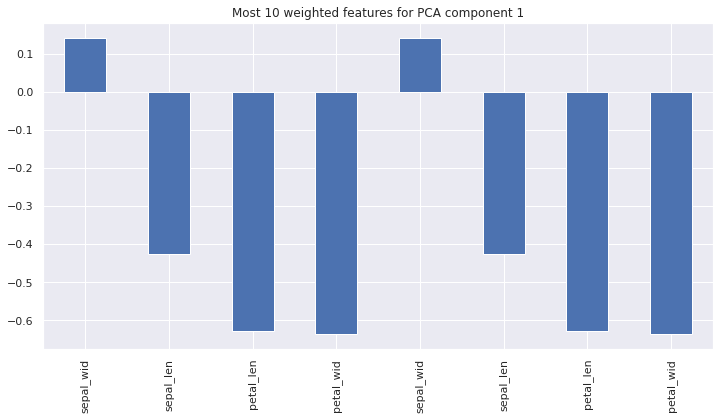

sepal_wid    0.1429
sepal_len   -0.4254
petal_len   -0.6270
petal_wid   -0.6368
sepal_wid    0.1429
sepal_len   -0.4254
petal_len   -0.6270
petal_wid   -0.6368
Name: 0, dtype: float64


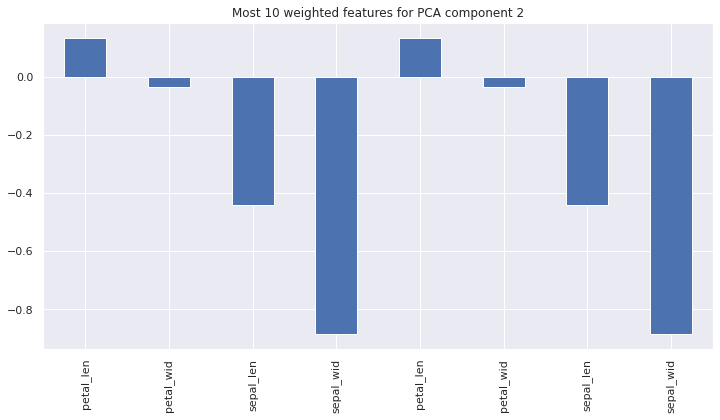

petal_len    0.1334
petal_wid   -0.0345
sepal_len   -0.4427
sepal_wid   -0.8860
petal_len    0.1334
petal_wid   -0.0345
sepal_len   -0.4427
sepal_wid   -0.8860
Name: 1, dtype: float64


In [66]:
for i in np.arange(0, 3, 1):
    res = pca_results(features_final, pca, i, 5)
    print(res)